In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
k2 = 3

In [112]:
A0 = 1
B0 = 1
C0 = 8

In [113]:
T = 10
dt = 0.1
t = np.linspace(0, T, int(T/dt) + 1)

In [114]:
def A10vsK(k1):
    def dAdt(A, B, C):
        return -k1*A*B + k2*C

    def dBdt(A, B, C):
        return -k1*A*B + k2*C

    def dCdt(A, B, C):
        return k1*A*B - k2*C

    # Estimate by Runge-Kutta Method
    A_rk = np.zeros(len(t))
    A_rk[0] = A0

    B_rk = np.zeros(len(t))
    B_rk[0] = B0

    C_rk = np.zeros(len(t))
    C_rk[0] = C0

    for it in range(1, len(t)):    
        xk1 = dAdt(A_rk[it-1], B_rk[it-1], C_rk[it-1])
        yk1 = dBdt(A_rk[it-1], B_rk[it-1], C_rk[it-1])
        zk1 = dCdt(A_rk[it-1], B_rk[it-1], C_rk[it-1])
        xk2 = dAdt(A_rk[it-1] + xk1 * dt/2, B_rk[it-1] + yk1 * dt/2, C_rk[it-1] + zk1 * dt/2)
        yk2 = dBdt(A_rk[it-1] + xk1 * dt/2, B_rk[it-1] + yk1 * dt/2, C_rk[it-1] + zk1 * dt/2)
        zk2 = dCdt(A_rk[it-1] + xk1 * dt/2, B_rk[it-1] + yk1 * dt/2, C_rk[it-1] + zk1 * dt/2)
        xk3 = dAdt(A_rk[it-1] + xk2 * dt/2, B_rk[it-1] + yk2 * dt/2, C_rk[it-1] + zk2 * dt/2)
        yk3 = dBdt(A_rk[it-1] + xk2 * dt/2, B_rk[it-1] + yk2 * dt/2, C_rk[it-1] + zk2 * dt/2)
        zk3 = dCdt(A_rk[it-1] + xk2 * dt/2, B_rk[it-1] + yk2 * dt/2, C_rk[it-1] + zk2 * dt/2)
        xk4 = dAdt(A_rk[it-1] + xk3 * dt, B_rk[it-1] + yk3 * dt, C_rk[it-1] + zk3 * dt)
        yk4 = dBdt(A_rk[it-1] + xk3 * dt, B_rk[it-1] + yk3 * dt, C_rk[it-1] + zk3 * dt)
        zk4 = dCdt(A_rk[it-1] + xk3 * dt, B_rk[it-1] + yk3 * dt, C_rk[it-1] + zk3 * dt)

        A_rk[it] = A_rk[it-1] + (1/6) * dt * (xk1 + 2*xk2 + 2*xk3 + xk4)
        B_rk[it] = B_rk[it-1] + (1/6) * dt * (yk1 + 2*yk2 + 2*yk3 + yk4)
        C_rk[it] = C_rk[it-1] + (1/6) * dt * (zk1 + 2*zk2 + 2*zk3 + zk4)

    return A_rk[10]

In [115]:
k = np.linspace(1, 5, 20)
A10 = np.zeros(len(k))

for it in range(0, len(k)):
    A10[it] = A10vsK(k[it])

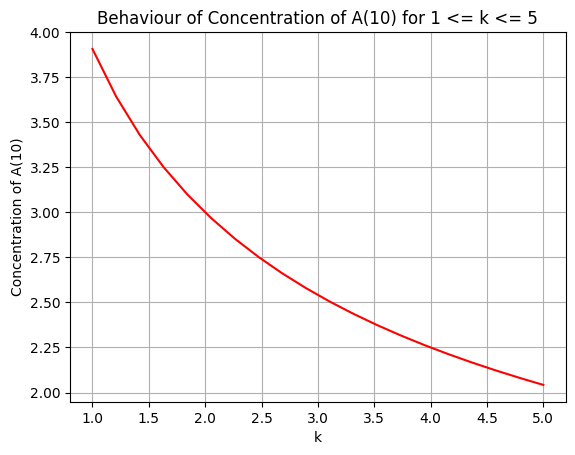

In [116]:
plt.plot(k, A10, color='red')
plt.xlabel('k')
plt.ylabel('Concentration of A(10)')
plt.title('Behaviour of Concentration of A(10) for 1 <= k <= 5')
plt.grid()

plt.show()